In [9]:
import json
from matplotlib import pyplot as plt

In [10]:
depositonce = json.load(open('../../data/json/depositonce/subjects.json'))  # dict of subjects (keys) and the list of publications they appear in (values).
edoc = json.load(open('../../data/json/edoc/subjects.json'))
refubium = json.load(open('../../data/json/refubium/subjects.json'))
subjects = depositonce.copy()
for subject in edoc:
    if subject in subjects:
        subjects[subject] += edoc[subject]
    else:
        subjects[subject] = edoc[subject]
for subject in refubium:
    if subject in subjects:
        subjects[subject] += refubium[subject]
    else:
        subjects[subject] = refubium[subject]
counts = {subject: len(subjects[subject]) for subject in subjects}  # same as subjects, but the length of the list as values.
sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

In [11]:
subject_sizes = dict()
for subject, cnt in counts.items():
    if cnt not in subject_sizes:
        subject_sizes[cnt] = 0
    subject_sizes[cnt] += 1
sorted_sizes = sorted(subject_sizes.items())

In [12]:
print(f'In total, there are {len(counts)} subjects in the repository.')
print(f'{sorted_sizes[0][1]} of them appear only once in the repository, i.e. only one publication mentions it.')

In total, there are 174496 subjects in the repository.
131934 of them appear only once in the repository, i.e. only one publication mentions it.


In [13]:
print('These are the three most popular subjects:')
n = 0
for subject, cnt in sorted_counts.items():
    print(f'"{subject}" appears in {cnt} publications')
    n += 1
    if n == 3: break

These are the three most popular subjects:
"ddc:610" appears in 12154 publications
"ddc:570" appears in 2973 publications
"ddc:530" appears in 2788 publications


These subjects (which are the only ones that appear in more than 1,000 publications) are very general and wouldn't be of use for a recommender system.

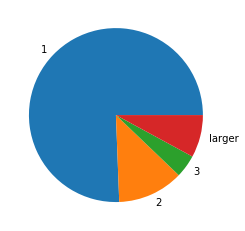

In [14]:
subject_size, subject_count = zip(*sorted_sizes)
grouped_sizes = sorted_sizes[:3] + [('larger', sum([tup[1] for tup in sorted_sizes[3:]]))]
plt.pie([t[1] for t in grouped_sizes], labels=[t[0] for t in grouped_sizes])
plt.show()

This pie chart shows how often subjects occur. The wedge with value 1 represents how many subjects occur only once in the repository. More than three quarters of the subjects occur only once.

In [17]:
shared_subjects = {}
for subject in depositonce:
    present_in = ['TU']
    if subject in edoc:
        present_in.append('HU')
    if subject in refubium:
        present_in.append('FU')
    if len(present_in) > 1:
        shared_subjects[subject] = present_in
for subject in edoc:
    present_in = ['HU']
    if subject in refubium:
        present_in.append('FU')
    if len(present_in) > 1:
        shared_subjects[subject] = present_in

In [24]:
print(f"{len([1 for v in shared_subjects.values() if len(v) == 3])} subjects appear all three repositories")
print(f"{len([1 for v in shared_subjects.values() if 'HU' in v and 'TU' in v])} subjects are shared by depositonce and edoc.")
print(f"{len([1 for v in shared_subjects.values() if 'HU' in v and 'FU' in v])} subjects are shared by refubium and edoc.")
print(f"{len([1 for v in shared_subjects.values() if 'FU' in v and 'TU' in v])} subjects are shared by DepositOnce and refubium.")

0 subjects appear all three repositories
4305 subjects are shared by depositonce and edoc.
10557 subjects are shared by refubium and edoc.
2927 subjects are shared by DepositOnce and refubium.
